# pymcfost tutorial


This notebook illustrate some of the main capabilities of pymcfost to run and explore mcfost models. We assume here that you are already familiar with the use of mcfost

We first perform basic imports.
The python package is named pymcfost to avoid confusion with mcfost itself, but we import it as mcfost for convenience.

In [228]:
%matplotlib inline
import matplotlib.pyplot as plt
import pymcfost as mcfost 

#from import_functions_generic import *

from import_packages_generic import *

if 1 :
    plt.style.use('classic')
    from matplotlib.axes import rcParams
    rcParams.update({'image.cmap':'magma', 'image.origin':'lower', 'image.interpolation':'nearest',
                 'figure.figsize':(4, 3), 'savefig.bbox':'tight',
                 'font.size': 14,  'axes.labelsize' : 14, 'legend.fontsize' : 13, #'colorbar.fontsize' : 13,
                 "font.family": "serif", 'text.usetex' : True, "font.serif": [], "font.sans-serif": [], 'mathtext.fontset':'stix',
                 'legend.handlelength': 2, 'legend.borderaxespad' : 0.8, 'legend.columnspacing' : 0.5, 'legend.handletextpad' : 0.5,
                 'xtick.direction':"in", 'ytick.direction':"in", #'xtick.color':'white', 'ytick.color':'white',
                 'xtick.major.width':1.3,'xtick.major.size':8, 'xtick.minor.width':1,'xtick.minor.size':5,
                 'ytick.major.width':1.3,'ytick.major.size':8, 'ytick.minor.width':1,'ytick.minor.size':5,
                 })

In [229]:
## Initialize saving directory
L = time.localtime()
date = "{}-{}-{}".format(L[0],L[1],L[2],L[3],L[4],L[5])

saving_dir = 'figs/fig_v{}/'.format(date)
os.makedirs(saving_dir,exist_ok=True)

In [230]:
## Main paths
infolder = '/Users/desgranc/Documents/work/GitHub_clone/projects/HD102326/create_disk_model_radiative_transfert_mcfost/'
#configfile = 'config_files/job2_HD120326_ext_halo.para'
configfile = 'config_files/job10_HD120326_1belt_ext_halo.para'
#configfile = 'config_files/job3_HD120326_2belts.para'
#configfile = 'config_files/job0_tuto_4.0.para'

## Running a mcfost model


``mcfost.run`` performs a system call and run the mcfost binary, assuming it is available in your system path.

We make sure to delete any potential previous model.
Note that when running pymcfost from a notebook, the mcfost output is displayed in the terminal, not in the notebook.

In [231]:
help(mcfost.run)

Help on function run in module pymcfost.run:

run(filename, options='', delete_previous=False, notebook=False, logfile=None, silent=False)



In [232]:
mcfost.run(infolder+configfile, delete_previous=True)

pymcfost: Running mcfost ...
 You are running MCFOST 4.1.01
 Git SHA = 0ff9723c3a55f0f4f4ce132523e7370822ef5e00
 Wrong version of the parameter file.
 Trying to read 4.0 parameter file.
 Pbs can appear. Parameter file should be updated !!!
 it can be turned back on with -rt2
 Input file read successfully
 Thermal equilibrium calculation
 Temperature calculation under LTE approximation
 Parallelized code on  10 processors
  
Dim 15 oct 2023 16:58:26 CEST
 Creating directory ././data_th
 Using ray-tracing method 1
 Reading /Users/desgranc/Documents/work/other_codes/mcfost/utils/Dust/Draine_Si_
 sUV.dat
 Reading /Users/desgranc/Documents/work/other_codes/mcfost/utils/Dust/Draine_Si_
 sUV.dat
 Number of regions detected: 2
 zone 1 --> region= 1 : R=10.00 to 200.00 AU
 zone 2 --> region= 2 : R=500.00 to 800.00 AU
 Using        7000 cells
 Total  gas mass in model:  2.0000000E-06  Msun
 Total dust mass in model:  2.0000000E-08  Msun
 Using scattering method 2
 Trying to find appropriate stel

### Reading the model and plotting the temperature map and SED


We first read the model:


In [233]:
model = mcfost.SED("./data_th/")

We can acces the parameter file values via model.P and display them:

In [234]:
print(model.P)

4.0                       mcfost version

#-- Number of photon packages --
  1.28e+05                nbr_photons_eq_th  : T computation
  12800                   nbr_photons_lambda : SED computation
  1.28e+06                nbr_photons_image : images computation

#-- Wavelength --
  50   0.100   3000.000      n_lambda, lambda_min, lambda_max [microns]
  True True True         compute temperature?, compute sed?, use default wavelength grid ?
  IMLup.lambda            wavelength file (if previous parameter is F)
  True True              separation of different contributions?, stokes parameters?

#-- Grid geometry and size --
  1                       1 = cylindrical, 2 = spherical
  100 70 1 20             n_rad (log distribution), nz (or n_theta), n_az, n_rad_in

#-- Maps --
  481 481 1700.0           grid (nx,ny), size [au]
  72.0  82.0   3 False    RT: imin, imax, n_incl, centered ?
  0.0   0.0    1          RT: az_min, az_max, n_az
  113.27                  distance (pc)
  -90.00   

 and plot the temperature structure:


In [235]:
help(model.plot_T)

Help on method plot_T in module pymcfost.SED:

plot_T(iaz=0, log=False, Tmin=None, Tmax=None) method of pymcfost.SED.SED instance



Trying to read grid structure ...
No grid structure, trying to create it ...
pymcfost: Running mcfost ...
 You are running MCFOST 4.1.01
 Git SHA = 0ff9723c3a55f0f4f4ce132523e7370822ef5e00
 Wrong version of the parameter file.
 Trying to read 4.0 parameter file.
 Pbs can appear. Parameter file should be updated !!!
 it can be turned back on with -rt2
 Input file read successfully
 Computation of disk structure
 Creating directory ././data_disk
 Parallelized code on  10 processors
  
Dim 15 oct 2023 16:58:44 CEST
 Using ray-tracing method 1
 Reading /Users/desgranc/Documents/work/other_codes/mcfost/utils/Dust/Draine_Si_
 sUV.dat
 Reading /Users/desgranc/Documents/work/other_codes/mcfost/utils/Dust/Draine_Si_
 sUV.dat
 Number of regions detected: 2
 zone 1 --> region= 1 : R=10.00 to 200.00 AU
 zone 2 --> region= 2 : R=500.00 to 800.00 AU
 Using        7000 cells
 Total  gas mass in model:  2.0000000E-06  Msun
 Total dust mass in model:  2.0000000E-08  Msun
 Using scattering method 2
 Wri

/Users/desgranc/Documents/work/other_codes/pymcfost/pymcfost/SED.py:204: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(r, z, T, norm=mcolors.LogNorm(vmin=Tmin, vmax=Tmax))


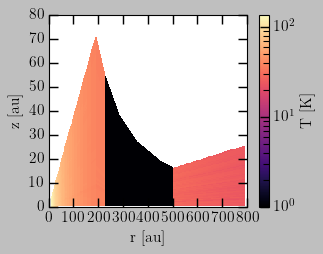

In [236]:
namesave = 'temperature_profile'

model.plot_T()
#plt.xlim([0,1000])
plt.savefig(saving_dir+namesave+'.pdf')

a "log" view makes it easier to see the temperature structure:

/Users/desgranc/Documents/work/other_codes/pymcfost/pymcfost/SED.py:183: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(r, z / r, T, norm=mcolors.LogNorm(vmin=Tmin, vmax=Tmax))


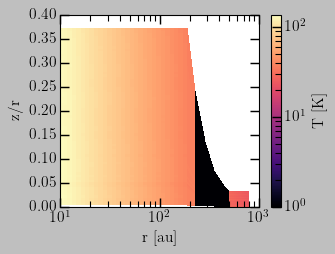

In [237]:
namesave = 'temperature_profile_log'

model.plot_T(log=True)
plt.savefig(saving_dir+namesave+'.pdf')

We can also plot the SED for the 1st inclination:

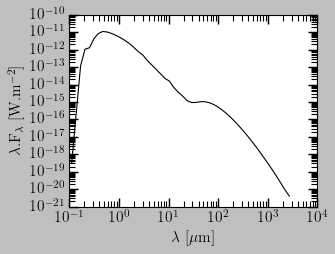

In [238]:
namesave = 'SED_total'
model.plot(0)

plt.savefig(saving_dir+namesave+'.pdf')

The SED above is a bit noisy in the mid-infrared, we can increase the number of packets by a factor 10, and re-run the model. We also use a blackbody for the star instead of a proper spectrum.

In [239]:
import copy
P = copy.copy(model.P)
P.phot.nphot_SED *= 1 #0     # 10 times more packets for the SED
P.stars[0].is_bb = False   # we do not want the star to be a black-body
P.writeto("tmp.para")
mcfost.run("tmp.para", delete_previous=True)  # We need to recompute everything because we changed the star

pymcfost: Running mcfost ...
 You are running MCFOST 4.1.01
 Git SHA = 0ff9723c3a55f0f4f4ce132523e7370822ef5e00
 Wrong version of the parameter file.
 Trying to read 4.0 parameter file.
 Pbs can appear. Parameter file should be updated !!!
 it can be turned back on with -rt2
 Input file read successfully
 Thermal equilibrium calculation
 Temperature calculation under LTE approximation
 Parallelized code on  10 processors
  
Dim 15 oct 2023 16:58:46 CEST
 Creating directory ././data_th
 Using ray-tracing method 1
 Reading /Users/desgranc/Documents/work/other_codes/mcfost/utils/Dust/Draine_Si_
 sUV.dat
 Reading /Users/desgranc/Documents/work/other_codes/mcfost/utils/Dust/Draine_Si_
 sUV.dat
 Number of regions detected: 2
 zone 1 --> region= 1 : R=10.00 to 200.00 AU
 zone 2 --> region= 2 : R=500.00 to 800.00 AU
 Using        7000 cells
 Total  gas mass in model:  2.0000000E-06  Msun
 Total dust mass in model:  2.0000000E-08  Msun
 Using scattering method 2
 Trying to find appropriate stel

Let's read the new model and plot it again.

We can also plot the various contribution:
 - pink : direct stellar light
 - blue : scattered stellar light
 - red : direct thermal emission
 - green : scattered thermal emission

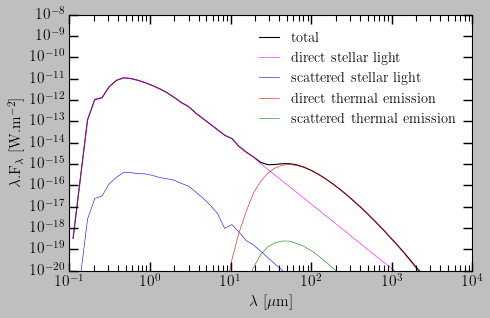

In [240]:
namesave = 'SED_contributions'
plt.figure(figsize=(6.5,4))

model = mcfost.SED("./data_th/")
model.plot(0, contrib=True)

legend_drawn_flag = False 

plt.legend(["total", "direct stellar light", 
           "scattered stellar light","direct thermal emission","scattered thermal emission"], 
           loc=0, ncol=1, frameon=legend_drawn_flag)

#plt.xlim(0.1,1e5) 
plt.ylim(1e-20,1e-8)   # we reduce the range on the y axis

plt.savefig(saving_dir+namesave+'.pdf')

## Scattered light images and polarisation maps

We can compute scattered-light images at 1micron and plot the corresponding maps.

In [241]:
# Parameters
figsize = (12,3)
xlim, ylim = [7,-7], [-5,5]
add_text, color_text = 1, 'white'
vmax = 1e-19

# Modelling parameters
imin, imax = model.P.map.RT_imin, model.P.map.RT_imax
imid = imin + (imax-imin)/2

INC = np.array([imin, imid, imax])
TEXTS = ["i = {:.0f} deg".format(i) for i in INC]

pymcfost: Running mcfost ...
 You are running MCFOST 4.1.01
 Git SHA = 0ff9723c3a55f0f4f4ce132523e7370822ef5e00
 Wrong version of the parameter file.
 Trying to read 4.0 parameter file.
 Pbs can appear. Parameter file should be updated !!!
 Input file read successfully
 Scattered light + thermal emission map calculation
 Calculating image at wavelength =   18.00000      microns
 Parallelized code on  10 processors
  
Dim 15 oct 2023 18:20:58 CEST
 Creating directory ././data_18
 Using ray-tracing method 2
 Reading /Users/desgranc/Documents/work/other_codes/mcfost/utils/Dust/Draine_Si_
 sUV.dat
 Reading /Users/desgranc/Documents/work/other_codes/mcfost/utils/Dust/Draine_Si_
 sUV.dat
 Number of regions detected: 2
 zone 1 --> region= 1 : R=10.00 to 200.00 AU
 zone 2 --> region= 2 : R=500.00 to 800.00 AU
 Using        7000 cells
 Total  gas mass in model:  2.0000000E-06  Msun
 Total dust mass in model:  2.0000000E-08  Msun
 Using scattering method 2
 Trying to find appropriate stellar spe

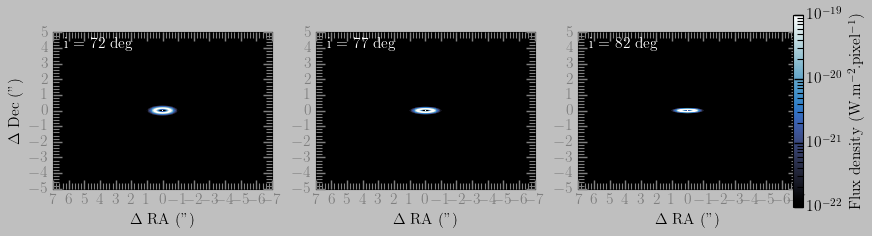

In [249]:
wmic = "18"

import shutil
try: shutil.rmtree('data_{}_old'.format(wmic)); print('previous folder removed:', 'data_{}_old'.format(wmic))
except: pass

namesave = 'images_scattered_{}mic'.format(wmic)

mcfost.run(infolder+configfile,options = "-img {}".format(wmic)) #, delete_previous=True)

image_1mum = mcfost.Image("./data_{}/".format(wmic))

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=figsize)
cbar = False
no_ylabel = False
for i in range(3):
    ax = axes[i]
    if i==2:
        cbar=True
    if i>0:
        no_ylabel=True
    image_1mum.plot(i, ax=ax, vmax=vmax, colorbar=cbar, colorbar_size=None, no_ylabel=no_ylabel)
    ax.set_xlim(xlim); ax.set_ylim(ylim)
    if add_text:
        ax.text(0.05,0.9, TEXTS[i], color=color_text, transform = axes[i].transAxes)
    ax.tick_params(colors='grey', which='both')
    ax.xaxis.set_major_locator(plt.MultipleLocator(1))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(0.2))
    ax.yaxis.set_major_locator(plt.MultipleLocator(1))
    ax.yaxis.set_minor_locator(plt.MultipleLocator(0.2))
        
plt.savefig(saving_dir+namesave+'.pdf')

Notes flux:

    Wm2_to_Jy(1e-20,nu).value / (31.2e-3)**2  = 1.6 mJy /arcsec^2
    
donc bien faible...

In [211]:
#help(image_1mum.plot)

We can also plot the corresponding polarisation maps, for instance the Qphi map with overlayed polarisation vectors:

/Users/desgranc/Documents/work/other_codes/pymcfost/pymcfost/image.py:455: RuntimeWarning: invalid value encountered in true_divide
  pola = 100 * np.sqrt((Qb / np.maximum(Ib,1e-300)) ** 2 + (Ub / np.maximum(Ib,1e-300)) ** 2)


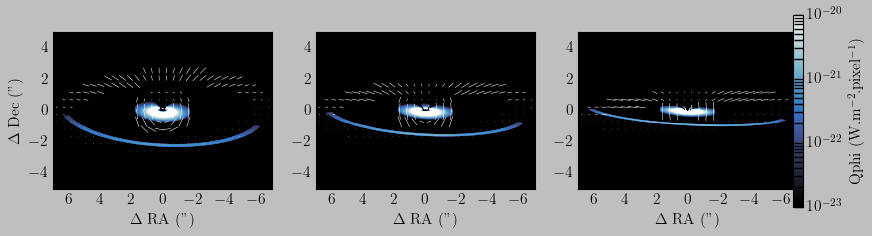

In [209]:
namesave = 'images_polar_overlay_vectors_{}mic'.format(wmic)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=figsize)
cbar = False
no_ylabel = False

for i in range(3):
    if i==2:
        cbar=True
    if i>0:
        no_ylabel=True
    image_1mum.plot(i, ax=axes[i], type="Qphi", vmax=vmax/10, colorbar=cbar, colorbar_size=None,
                    no_ylabel=no_ylabel, pola_vector=True, nbin=15)
    
    axes[i].set_xlim(xlim); axes[i].set_ylim(ylim)
    
plt.savefig(saving_dir+namesave+'.pdf')

In [138]:
wmic = 1300

mcfost.run(infolder+configfile,options = "-img {}".format(wmic))
image_1mm  = mcfost.Image("./data_{}/".format(wmic))

pymcfost: Running mcfost ...
 You are running MCFOST 4.1.01
 Git SHA = 0ff9723c3a55f0f4f4ce132523e7370822ef5e00
 Wrong version of the parameter file.
 Trying to read 4.0 parameter file.
 Pbs can appear. Parameter file should be updated !!!
           with a cylindrical grid !!!!
 Input file read successfully
 Scattered light + thermal emission map calculation
 Calculating image at wavelength =   1300.000      microns
 Parallelized code on  10 processors
  
Ven 13 oct 2023 14:38:11 CEST
 Creating directory ././data_1300
 Using ray-tracing method 2
 Reading /Users/desgranc/Documents/work/other_codes/mcfost/utils/Dust/Draine_Si_
 sUV.dat
 Reading /Users/desgranc/Documents/work/other_codes/mcfost/utils/Dust/Draine_Si_
 sUV.dat
 Number of regions detected: 2
 zone 1 --> region= 1 : R=10.00 to 200.00 AU
 zone 2 --> region= 2 : R=800.00 to 1000.00 AU
 Using        7000 cells
 Total  gas mass in model:  2.0000000E-06  Msun
 Total dust mass in model:  2.0000000E-08  Msun
 Using scattering metho

/Users/desgranc/Documents/work/other_codes/pymcfost/pymcfost/utils.py:100: RuntimeWarning: divide by zero encountered in true_divide
  exp_m1 = pixel_area * 2.0 * sc.h * nu ** 4 / (sc.c ** 2 * nuFnu)


Max Tb= 2.1445403 K
Max Tb= 2.1445403 K
Max Tb= 2.1445942 K


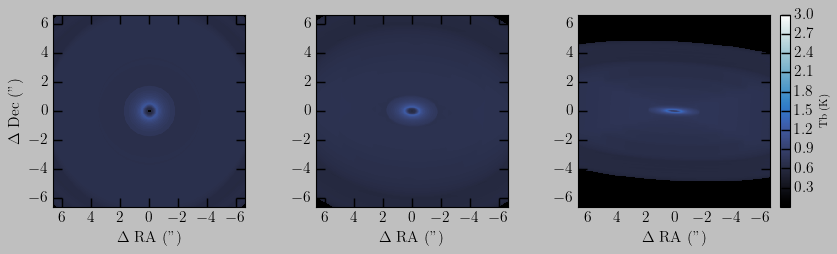

In [139]:
namesave = 'images_scattered_{}mic'.format(wmic)

fig.clf()
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=figsize)

vmax=30

cbar = False
no_ylabel = False
for i in range(3):
    if i==2:
        cbar=True
    if i>0:
        no_ylabel=True
    image_1mm.plot(i, ax=axes[i],  vmax=vmax/10, Tb=True, colorbar=cbar, no_ylabel=no_ylabel)
plt.savefig(saving_dir+namesave+'.pdf')

### Density of each cell

In [ ]:
#mcfost.run(infolder+configfile,options = "-disk_struct"

In [140]:
#mcfost.run(infolder+configfile,options = "-no_T -mol")

In [57]:
#mol = mcfost.Line("./data_CO/")

In [58]:
mol.plot_line(2)

NameError: name 'mol' is not defined

In [ ]:
mol.plot_map(2,v=0.5, Tb=True)

In [ ]:
mol.plot_map(2,v=0.5, bmaj=0.1, bmin=0.1, bpa=0, Tb=True)